# Is my Smoke Detector Radioactive?

### Data Analysis from Python and a GM-10 Device in Mountain View, CA

Thanks to Keith E. Fleming for loaning me the GM-10

![corona](./corona.jpeg)

---

In this paper we will play around with some overly simple science and stats related to radiation sources as they are captured from a GM-10 Geiger Counter Radiation Detector in Mountain View, CA in late Jan / early Feb 2018.

### About the GM-10

The GM-10 contains a geiger mueller tube, capable of detecting alpha, beta, and gamma / x-ray radiation. Each time a radiation particle enters the sensing window, it is detected, and the software on the attached computer is informed of this event.

By adding up the number of detections per minute, the Counts Per Minute (CPM) is calculated and displayed. This number is a relative indicator of the amount of radiation present.

See http://www.blackcatsystems.com/GM/products/GM10GeigerCounter.html

### A Note on Normal Background Radiation 

Background radiation is the ionizing radiation present in the environment. Background radiation originates from a variety of sources, both natural and artificial. Sources include cosmic radiation, and environmental radioactivity from such as naturally occurring radioactive materials including radon and radium, and fallout from nuclear weapons testing and nuclear accidents.

### A Note on Mountain View, CA

Mountain View is a city located in Santa Clara County, California, United States, named for its views of the Santa Cruz Mountains. From its origins as a stagecoach stop, it grew to a large suburb with a pedestrian-friendly downtown and a population of 74,066. The city borders Palo Alto and the San Francisco Bay to the north, Los Altos to the south, and Moffett Federal Airfield and Sunnyvale to the east.

Elevation 105 ft (32 m)

## On to the code...
---


### Loading the data

Over a period of several weeks I ran a series of tests using the GM-10.  The device can be set to store its readings to a file.  The readings are in a flat file with the format or "date_time", "reading in CM."

In [8]:
import pandas as pd

##########################################################################################
# Baselines
##########################################################################################

print("Loading the data... The sizes reported are (observations, attributes).")
# rad_recording-1-16-18 - orginal baseline
rad_recording01162018 = pd.read_csv('./data/rad_recording-1-16-18', header=None )
rad_recording01162018.columns = ['DateAndTime', 'Reading']
print("Loaded ",rad_recording01162018.shape, "into rad_recording01162018")

# rad_recording-1-16-18-v2 - orginal baseline v2
rad_recording01162018v2 = pd.read_csv('./data/rad_recording-1-16-18-v2', header=None )
rad_recording01162018v2.columns = ['DateAndTime', 'Reading']
print("Loaded ",rad_recording01162018v2.shape, "into rad_recording01162018v2")

#Baseline-2-4-2018 - updated baseline
Baseline02042018 = pd.read_csv('./data/Baseline-2-4-2018', header=None )
Baseline02042018.columns = ['DateAndTime', 'Reading']
print("Loaded ",Baseline02042018.shape, "into Baseline02042018")

#Baseline-v2-2-4-2018 - long running baseline
Baseline02042018v2 = pd.read_csv('./data/Baseline-v2-2-4-2018', header=None )
Baseline02042018v2.columns = ['DateAndTime', 'Reading']
print("Loaded ",Baseline02042018v2.shape, "into Base|line02042018v2")

##########################################################################################
# Test Cases
##########################################################################################

# StreamingLTE-2-4-2018 - steaming music over LTE
StreamingLTE02042018 = pd.read_csv('./data/StreamingLTE-2-4-2018', header=None )
StreamingLTE02042018.columns = ['DateAndTime', 'Reading']
print("Loaded ",StreamingLTE02042018.shape, "into StreamingLTE02042018")

# Dectector-2-4-2018 - smoke detector case on near screen
Detector02042018 = pd.read_csv('./data/Detector-2-4-2018', header=None )
Detector02042018.columns = ['DateAndTime', 'Reading']
print("Loaded ",Detector02042018.shape, "into Detector02042018")

# Detector-v2-2-6-2018 - smoke detector most of case removed near screen
Detector02062018v2 = pd.read_csv('./data/Detector-v2-2-6-2018', header=None )
Detector02062018v2.columns = ['DateAndTime', 'Reading']
print("Loaded ",Detector02062018v2.shape, "into Detector02062018v2")

# Detector-2-6-2018-v3 - smoke detector most of case removed Apporx 20 inches away
Detector02062018v3 = pd.read_csv('./data/Detector-2-6-2018-v3', header=None )
Detector02062018v3.columns = ['DateAndTime', 'Reading']
print("Loaded ",Detector02062018v3.shape, "into Detector02062018v3")


Loading the data... The sizes reported are (observations, attributes).
Loaded  (24, 2) into rad_recording01162018
Loaded  (41, 2) into rad_recording01162018v2
Loaded  (43, 2) into Baseline02042018
Loaded  (2315, 2) into Base|line02042018v2
Loaded  (20, 2) into StreamingLTE02042018
Loaded  (75, 2) into Detector02042018
Loaded  (528, 2) into Detector02062018v2
Loaded  (1575, 2) into Detector02062018v3


## Few Records from the Baseline
Let's grab the first 5 rows from our baseline data.  The data is recorded with a date and time (PST) and a Reading which is the Counts Per Minute (CPM) as captured by the GM-10.

In [9]:
Baseline02042018v2.head()

,DateAndTime,Reading
0,2/4/2018 5:30:44 PM,13
1,2/4/2018 5:31:44 PM,10
2,2/4/2018 5:32:44 PM,13
3,2/4/2018 5:33:45 PM,17
4,2/4/2018 5:34:45 PM,12


## Checkout the Baseline Data - Background Radiation Plot Counts Per Minute (CPM)

This was the longest run on the GM-10 - just getting baseline readings over 2,315 minutes.

In [10]:
from matplotlib import pyplot
import seaborn as sns; sns.set(color_codes=True)

In [11]:
from scipy import stats
print("Describe the baseline data using python's stats.describe from scipy")
print("")
print(stats.describe(Baseline02042018v2["Reading"]))
print("")
print("Cool, mean is about 13.6 which is in the noraml range.")

Describe the baseline data using python's stats.describe from scipy

DescribeResult(nobs=2315, minmax=(4, 26), mean=13.568466522678186, variance=12.525452919686909, skewness=0.23649205306051713, kurtosis=-0.11141903203759629)

Cool, mean is about 13.6 which is in the noraml range.


### Plot the Baseline

Time series is noisy.

/Users/bohoro/anaconda3/envs/main/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


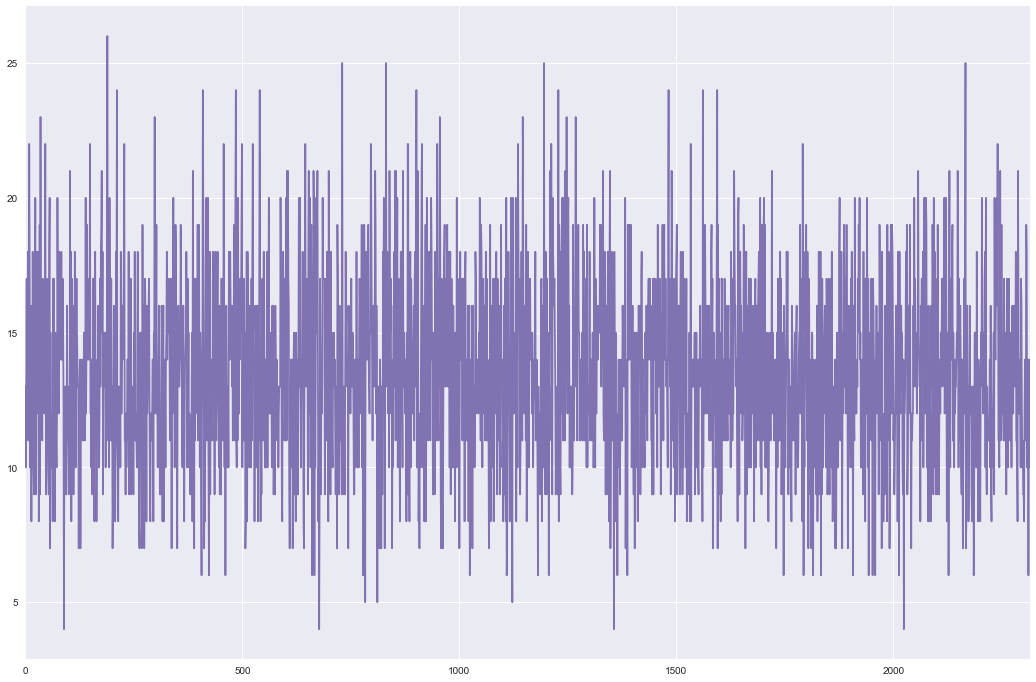

In [12]:
%matplotlib inline
fig, ax = pyplot.subplots(figsize=(18, 12))
myplot = sns.tsplot(ax=ax, data=Baseline02042018v2["Reading"], ci=[68, 95], color="m")

Plot the distribution.

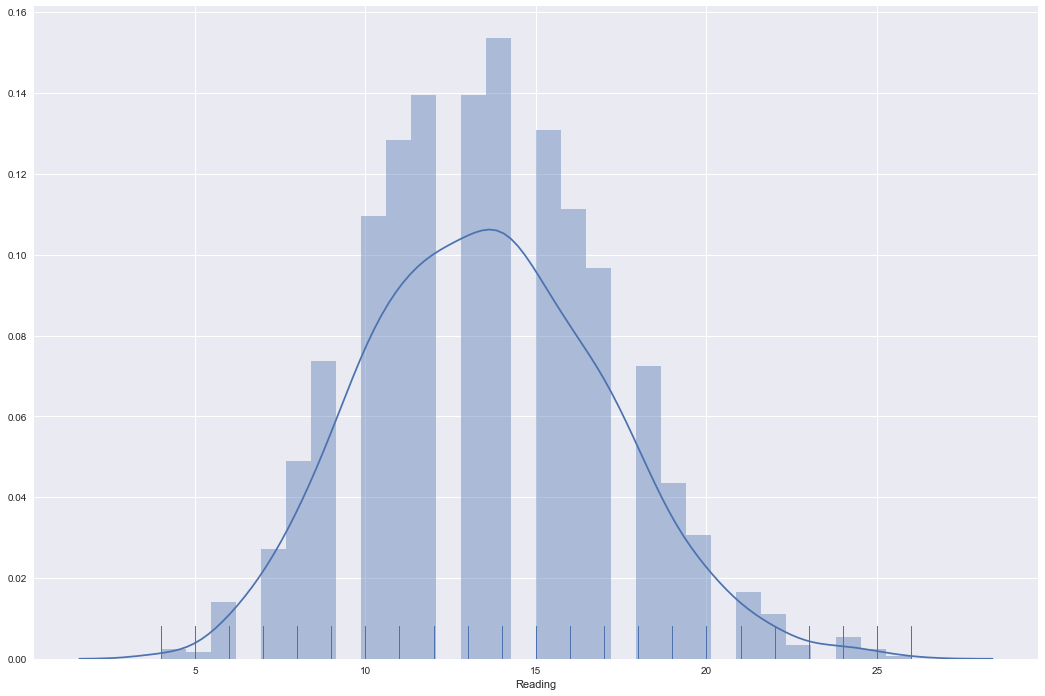

In [13]:
fig, ax = pyplot.subplots(figsize=(18, 12))
myplot = sns.distplot(Baseline02042018v2["Reading"], ax=ax, hist=True, rug=True)

## The Experiments

Here we will check the baseline which is assumed to be the normal radiation in my house and then compare it to some interventions I did.  We will use a T test to analyze the experiments.  

### Notes on T Tests

The t test (also called Student’s T Test) compares two averages (means) and tells you if they are different from each other. The t test also tells you how significant the differences are; In other words it lets you know if those differences could have happened by chance.

---

### 2-sample t-test: testing for difference across populations


We are interesting in gathering information about two populations in order to compare them, i.e ultimately see if our smoke detector is radioactive!

### Baseline Radiation from 3 different time periods 
- Baseline radiation from 3 different background tests
- **Expectation is they are not different**

Not exhaustive but lets make sure background radiation is basically the same between a few time periods.


Describe the 3 Datasets

DescribeResult(nobs=2315, minmax=(4, 26), mean=13.568466522678186, variance=12.525452919686909, skewness=0.23649205306051713, kurtosis=-0.11141903203759629)
DescribeResult(nobs=43, minmax=(6, 19), mean=12.837209302325581, variance=9.6633444075304542, skewness=-0.3517557994725716, kurtosis=-0.4008208704360716)
DescribeResult(nobs=41, minmax=(4, 24), mean=13.365853658536585, variance=13.43780487804878, skewness=0.3201291899288072, kurtosis=1.2014488772418854)

T-test between samples 1 and 2, 1 and 3, as well as 2 and 3

Ttest_indResult(statistic=1.5243145050292874, pvalue=0.13457876177856343)
Ttest_indResult(statistic=0.35102605223116146, pvalue=0.72735184164312217)
Ttest_indResult(statistic=-0.71122204609620043, pvalue=0.47905451644515973)

Plot them



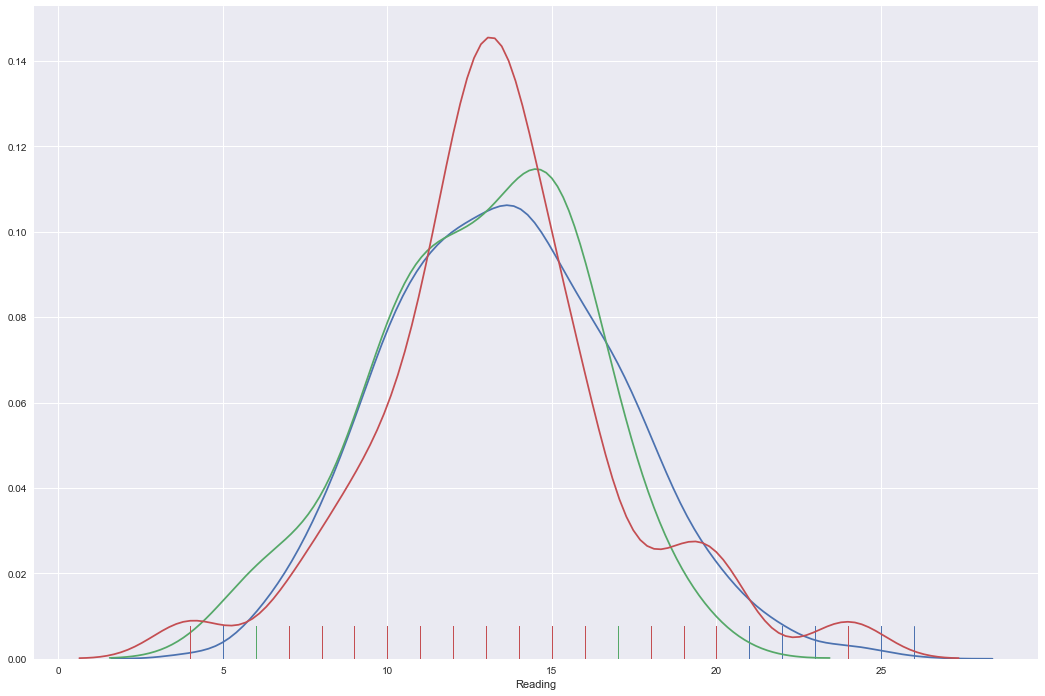

In [14]:
print("Describe the 3 Datasets")
print()
b1_sample = Baseline02042018v2["Reading"]
print(stats.describe(b1_sample))
b2_sample = Baseline02042018["Reading"]
print(stats.describe(b2_sample))
b3_sample = rad_recording01162018v2["Reading"]
print(stats.describe(b3_sample))

print()
print("T-test between samples 1 and 2, 1 and 3, as well as 2 and 3")
print()
print(stats.ttest_ind(b1_sample, b2_sample, equal_var = False) ) 
print(stats.ttest_ind(b1_sample, b3_sample, equal_var = False) )
print(stats.ttest_ind(b2_sample, b3_sample, equal_var = False) )

print()
print("Plot them")
print()

fig, ax = pyplot.subplots(figsize=(18, 12))
sns.distplot(b1_sample, ax=ax, hist=False, rug=True)
sns.distplot(b2_sample, ax=ax, hist=False, rug=True)
myplot = sns.distplot(b3_sample, ax=ax, hist=False, rug=True)




##### Result

If the p-value is less than 0.05, we reject the null hypothesis that there's no difference between the means and conclude that a significant difference does exist. If the p-value is larger than 0.05, we cannot conclude that a significant difference exists. 

** We cannot conclude that a significant difference exists ** 

My amateur nuclear physicist conclusion is background radiation is pretty much the same based on dates and times in Mountain View.

### Baseline Radiation compared to placing an actively streaming LTE phone near detector

##### Or is my cell phone producing alpha, beta, or gamma / x-ray radiation?
- Compare one baseline with one with streaming LTE nearby
- Expectation is they are not different - LTE radios do not produce alpha, beta, or gamma / x-ray radiation



Describe the 2 Datasets

DescribeResult(nobs=2315, minmax=(4, 26), mean=13.568466522678186, variance=12.525452919686909, skewness=0.23649205306051713, kurtosis=-0.11141903203759629)
DescribeResult(nobs=20, minmax=(9, 19), mean=14.35, variance=8.5552631578947356, skewness=0.12400464349633539, kurtosis=-0.7467882726096815)

T-test between samples 1 and 2, 1 and 3, as well as 2 and 3

Ttest_indResult(statistic=-1.1874532902929751, pvalue=0.24932457909587047)

Plot them



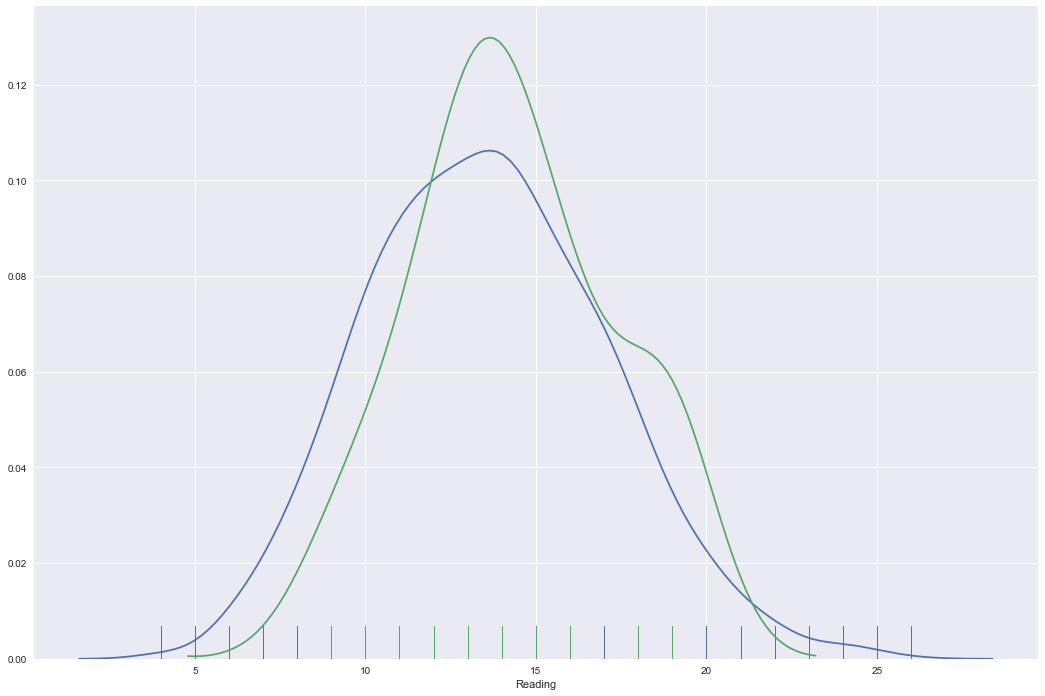

In [15]:
print("Describe the 2 Datasets")
print()
b1_sample = Baseline02042018v2["Reading"]
print(stats.describe(b1_sample))
b2_sample = StreamingLTE02042018["Reading"]
print(stats.describe(b2_sample))

print()
print("T-test between samples 1 and 2, 1 and 3, as well as 2 and 3")
print()
print(stats.ttest_ind(b1_sample, b2_sample, equal_var = False) )

print()
print("Plot them")
print()
fig, ax = pyplot.subplots(figsize=(18, 12))
sns.distplot(b1_sample, ax=ax, hist=False, rug=True)
myplot = sns.distplot(b2_sample, ax=ax, hist=False, rug=True)

##### Result

If the p-value is less than 0.05, we reject the null hypothesis that there's no difference between the means and conclude that a significant difference does exist. If the p-value is larger than 0.05, we cannot conclude that a significant difference exists. 

** We cannot conclude that a significant difference exists ** 

My amateur nuclear physicist conclusion is cell phones do not produce this type of radiation!

### Baseline Radiation compared to open smoke detector right next to detector
- Compare long baseline one with open smoke detector nearby
- Expectation is they are are different - smoke detectors produce alpha, beta, or gamma / x-ray radiation



Describe the 2 Datasets

DescribeResult(nobs=2315, minmax=(4, 26), mean=13.568466522678186, variance=12.525452919686909, skewness=0.23649205306051713, kurtosis=-0.11141903203759629)
DescribeResult(nobs=528, minmax=(10, 38), mean=24.34090909090909, variance=20.995514921511127, skewness=0.13474489521819372, kurtosis=0.0650080643055655)

T-test between samples 1 and 2

Ttest_indResult(statistic=-50.683440631670258, pvalue=1.1359710299537221e-232)

Plot them



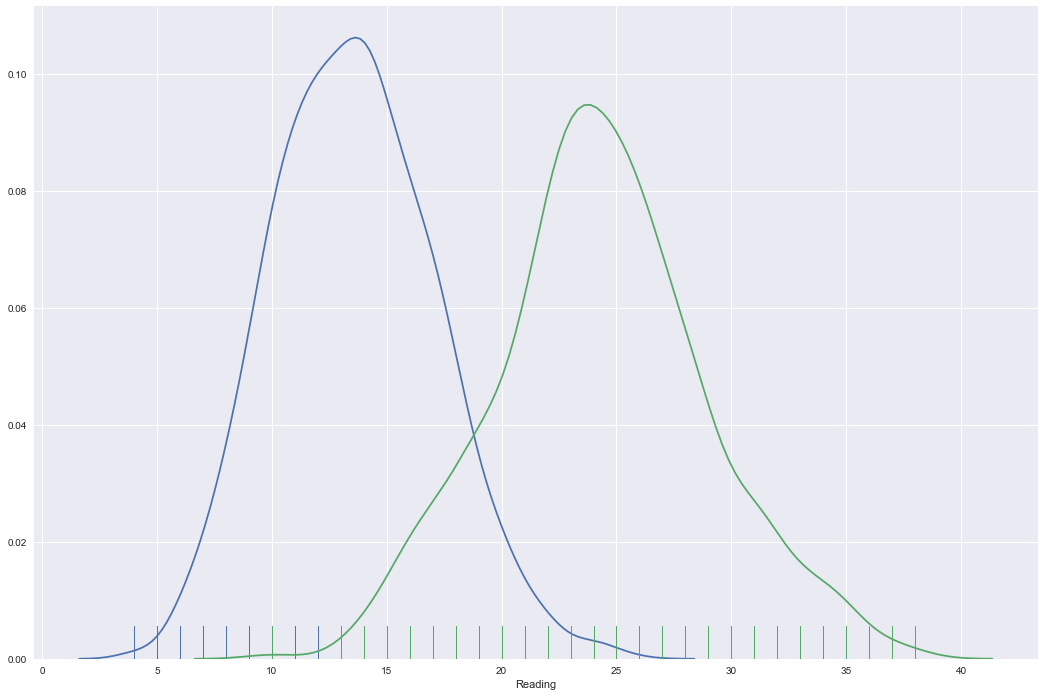

In [17]:
print("Describe the 2 Datasets")
print()
b1_sample = Baseline02042018v2["Reading"]
print(stats.describe(b1_sample))
b2_sample = Detector02062018v2["Reading"]
print(stats.describe(b2_sample))
print()
print("T-test between samples 1 and 2")
print()
print(stats.ttest_ind(b1_sample, b2_sample, equal_var = False) ) 

print()
print("Plot them")
print()
fig, ax = pyplot.subplots(figsize=(18, 12))
sns.distplot(b1_sample, ax=ax, hist=False, rug=True)
myplot = sns.distplot(b2_sample, ax=ax, hist=False, rug=True)

##### Result

If the p-value is less than 0.05, we reject the null hypothesis that there's no difference between the means and conclude that a significant difference does exist. If the p-value is larger than 0.05, we cannot conclude that a significant difference exists. 

** We cannot conclude that a significant difference exists ** 

Open Smoke detectors produce radiation

### The picture of Evil

I leave you with an image of the evil radiation producing device:

    Grampa: That doll is evil, I tell ya! Evil! Evil!    
    Marge: Grampa, you said that about all the other presents.    
    Grampa: I just want attention    
Treehouse of Horror III

![Pure Evil](./sd.jpg)